In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFECV

# for display dataframe
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    
train = pd.DataFrame(pd.read_csv("train.csv"))
test = pd.DataFrame(pd.read_csv("test_msd.csv"))

In [2]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
##check whether exist null or missing value
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We find out that there is many missing value in Age and Cabin.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# merge two data together to observe more information.

In [6]:
data =pd.concat([train,test], axis= 0)

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Survived', ylabel='count'>

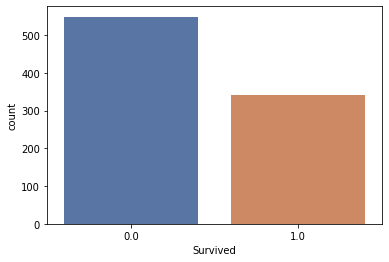

In [8]:
##Only about40% of people survived 
sns.countplot(data["Survived"],palette='deep')

<AxesSubplot:xlabel='Survived', ylabel='count'>

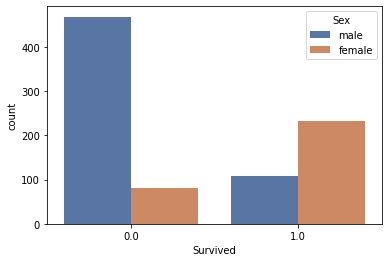

In [9]:
##female get higher Survival rate
sns.countplot(data["Survived"],hue = data["Sex"],palette='deep')

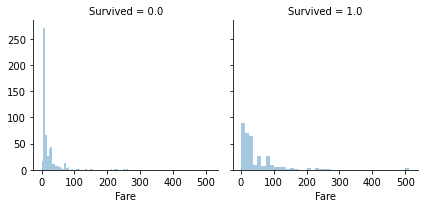

In [10]:
##Check survival rate of people with different fare
g = sns.FacetGrid(data, col='Survived', palette='deep')
g.map(sns.distplot, 'Fare', kde=False)

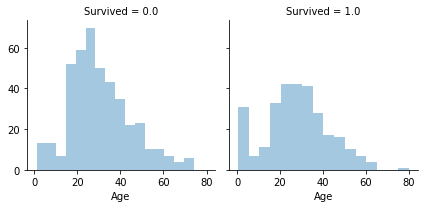

In [11]:
##Check survival rate of people in different age
g = sns.FacetGrid(data, col='Survived', palette='deep')
g.map(sns.distplot, 'Age', kde=False)

ADDDDDD


In [12]:
# Convert Sex into binary type
data['Sex_index'] = data['Sex'].map({'female':1,'male':0}).astype('int')

In [13]:
## observe Fare data 
data["Fare"].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [14]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_index
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [15]:
pd.pivot_table(data,values = ['Fare'], index = ['Pclass'], columns= ['Survived'] ,aggfunc = 'median')

Fare         
Survived    0.0      1.0
Pclass                  
1         44.75  77.9583
2         13.00  21.0000
3          8.05   8.5167

We can see higher class had higher survival rates

# Create new Fare feature.


# Conduct Feature store application here!


分成 fare 4,5,6 三種 feature 在titanic 這個feature_set 中。



In [16]:
## Fill the only missing value of Fare with median 
data["Fare"] = data["Fare"].fillna(data["Fare"].median())

In [17]:
## cut Fare data into 4,5,6 class
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

# Making Bins
data['FareBin_4'] = pd.qcut(data['Fare'], 4, labels=[0,1,2,3])
data['FareBin_5'] = pd.qcut(data['Fare'], 5, labels=[0,1,2,3,4])
data['FareBin_6'] = pd.qcut(data['Fare'], 6, labels=[0,1,2,3,4,5])

label = LabelEncoder()
data['FareBin_Code_4'] = label.fit_transform(data['FareBin_4'])
data['FareBin_Code_5'] = label.fit_transform(data['FareBin_5'])
data['FareBin_Code_6'] = label.fit_transform(data['FareBin_6'])

# cross tab
df_4 = pd.crosstab(data['FareBin_Code_4'],data['Pclass'])
df_5 = pd.crosstab(data['FareBin_Code_5'],data['Pclass'])
df_6 = pd.crosstab(data['FareBin_Code_6'],data['Pclass'])

display_side_by_side(df_4,df_5,df_6)

Pclass,1,2,3
FareBin_Code_4,,,
0,8,6,323
1,0,128,193
2,77,104,147
3,238,39,46
Pclass,1,2,3
FareBin_Code_5,,,
0,8,6,261
1,0,36,218
2,0,124,132


In [18]:
# split training set the testing set
train = data[:len(train)]
test = data[len(train):]

# Inputs set and labels
X = train.drop(labels=['Survived','PassengerId'],axis=1)
Y = train['Survived']

In [19]:
## compare feature's grid score 
compare = ['Sex_index','Pclass','FareBin_Code_4','FareBin_Code_5','FareBin_Code_6']
selector = RFECV(RandomForestClassifier(n_estimators=250,min_samples_split=20),cv=10,n_jobs=-1)
selector.fit(X[compare], Y)
#print(selector.support_)
#print(selector.ranking_)
print(selector.grid_scores_*100)

[78.67290886 77.44444444 79.01747815 79.57677903 80.70037453]


In [20]:
## compare feature's grid score with different random_state
score_b4,score_b5, score_b6 = [], [], []
seeds = 10
for i in range(seeds):
    diff_cv = StratifiedKFold(n_splits=10,shuffle=True,random_state=i)
    selector = RFECV(RandomForestClassifier(random_state=i,n_estimators=250,min_samples_split=20),cv=diff_cv,n_jobs=-1)
    selector.fit(X[compare], Y)
    score_b4.append(selector.grid_scores_[2])
    score_b5.append(selector.grid_scores_[3])
    score_b6.append(selector.grid_scores_[4])

In [21]:
#在不同的fare分法中，觀察在不同random seeds下的grid_score 表現 
print(score_b4)
print(score_b5)
print(score_b6)

[0.7946067415730338, 0.7912484394506867, 0.7968414481897628, 0.7889513108614231, 0.7879151061173533, 0.8058926342072409, 0.7946441947565542, 0.7979900124843945, 0.7992134831460674, 0.7990886392009988]
[0.7901498127340825, 0.7980024968789012, 0.7968289637952559, 0.8013358302122349, 0.7991385767790262, 0.8069912609238452, 0.8058302122347067, 0.8024594257178528, 0.8048314606741573, 0.8024594257178528]
[0.7935081148564295, 0.8069787765293384, 0.8035830212234707, 0.8069413233458178, 0.8002621722846441, 0.8080898876404493, 0.8069538077403247, 0.8058302122347067, 0.8048314606741572, 0.8035830212234705]


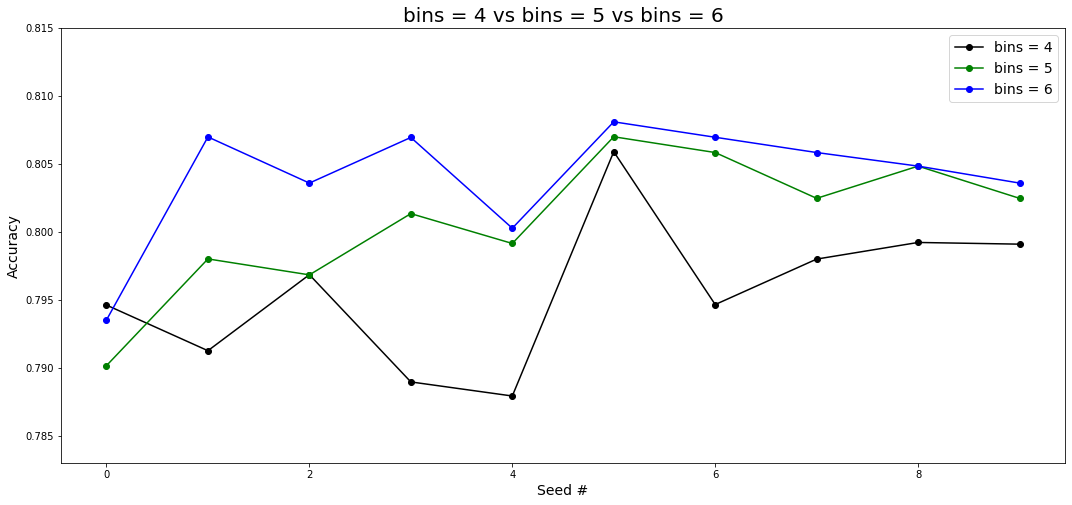

In [22]:
# to np.array and draw plot to visualize data
score_list = [score_b4, score_b5, score_b6]
for item in score_list:
    item = np.array(item*100)
# plot
fig = plt.figure(figsize= (18,8) )
ax = plt.gca()
ax.plot(range(seeds), score_b4,'-ok',label='bins = 4')
ax.plot(range(seeds), score_b5,'-og',label='bins = 5')
ax.plot(range(seeds), score_b6,'-ob',label='bins = 6')
ax.set_xlabel("Seed #", fontsize = '14')
ax.set_ylim(0.783,0.815)
ax.set_ylabel("Accuracy", fontsize = '14')
ax.set_title('bins = 4 vs bins = 5 vs bins = 6', fontsize='20')
plt.legend(fontsize = 14,loc='upper right')

In [23]:
b4, b5, b6 = ['Sex_index', 'Pclass','FareBin_Code_4'], ['Sex_index','Pclass','FareBin_Code_5'],\
['Sex_index','Pclass','FareBin_Code_6']
b4_Model = RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20,oob_score=True)
b4_Model.fit(X[b4], Y)
b5_Model = RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20,oob_score=True)
b5_Model.fit(X[b5], Y)
b6_Model = RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20,oob_score=True)
b6_Model.fit(X[b6], Y)
print('b4 oob score :%.5f' %(b4_Model.oob_score_),'   LB_Public : 0.7790')
print('b5 oob score :%.5f '%(b5_Model.oob_score_),' LB_Public : 0.79425')
print('b6 oob score : %.5f' %(b6_Model.oob_score_), '  LB_Public : 0.77033')

b4 oob score :0.80584    LB_Public : 0.7790
b5 oob score :0.81033   LB_Public : 0.79425
b6 oob score : 0.80135   LB_Public : 0.77033


Since b5 get higher oob score, We choose it as our new fare feature.

# Create Family Connection feature

In [24]:
data['Family_size'] = data['SibSp'] + data['Parch'] + 1

In [25]:
data['Family_size']

0      2
1      2
2      1
3      2
4      1
      ..
413    1
414    1
415    1
416    1
417    3
Name: Family_size, Length: 1309, dtype: int64

In [26]:
data.Ticket

0               A/5 21171
1                PC 17599
2        STON/O2. 3101282
3                  113803
4                  373450
              ...        
413             A.5. 3236
414              PC 17758
415    SOTON/O.Q. 3101262
416                359309
417                  2668
Name: Ticket, Length: 1309, dtype: object

In [27]:
duplicate_ticket = []
for tk in data.Ticket.unique():
    
    tem = data.loc[data.Ticket == tk, 'Fare']
    #print(tem.count())
    #print(tk,tem)
    if tem.count() > 1:
        #print(df_data.loc[df_data.Ticket == tk,['Name','Ticket','Fare']])
        duplicate_ticket.append(data.loc[data.Ticket == tk,['Name','Ticket','Fare','Cabin','Family_size','Survived']])
duplicate_ticket = pd.concat(duplicate_ticket)
duplicate_ticket.head(20)

,Name,Ticket,Fare,Cabin,Family_size,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,71.2833,C85,2,1.0
234,"Cumings, Mr. John Bradley",PC 17599,71.2833,C85,2,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,53.1000,C123,2,1.0
137,"Futrelle, Mr. Jacques Heath",113803,53.1000,C123,2,0.0
6,"McCarthy, Mr. Timothy J",17463,51.8625,E46,1,0.0
146,"Hilliard, Mr. Herbert Henry",17463,51.8625,E46,1,NaN
7,"Palsson, Master. Gosta Leonard",349909,21.0750,NaN,5,0.0
24,"Palsson, Miss. Torborg Danira",349909,21.0750,NaN,5,0.0
374,"Palsson, Miss. Stina Viola",349909,21.0750,NaN,5,0.0
567,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",349909,21.0750,NaN,5,0.0


In [28]:
##分類， family size = 1推論為朋友關係， family size >1 則推論彼此為家人關係 
df_fri = duplicate_ticket.loc[(duplicate_ticket.Family_size == 1) & (duplicate_ticket.Survived.notnull())].head(7)
df_fami = duplicate_ticket.loc[(duplicate_ticket.Family_size > 1) & (duplicate_ticket.Survived.notnull())].head(7)
display(df_fri,df_fami)
print('people keep the same ticket: %.0f '%len(duplicate_ticket))
print('friends: %.0f '%len(duplicate_ticket[duplicate_ticket.Family_size == 1]))
print('families: %.0f '%len(duplicate_ticket[duplicate_ticket.Family_size > 1]))

,Name,Ticket,Fare,Cabin,Family_size,Survived
6,"McCarthy, Mr. Timothy J",17463,51.8625,E46,1,0.0
20,"Fynney, Mr. Joseph J",239865,26.0000,NaN,1,0.0
791,"Gaskell, Mr. Alfred",239865,26.0000,NaN,1,0.0
195,"Lurette, Miss. Elise",PC 17569,146.5208,B80,1,1.0
681,"Hassab, Mr. Hammad",PC 17572,76.7292,D49,1,1.0
61,"Icard, Miss. Amelie",113572,80.0000,B28,1,1.0
829,"Stone, Mrs. George Nelson (Martha Evelyn)",113572,80.0000,B28,1,1.0


,Name,Ticket,Fare,Cabin,Family_size,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,71.2833,C85,2,1.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,53.1000,C123,2,1.0
137,"Futrelle, Mr. Jacques Heath",113803,53.1000,C123,2,0.0
7,"Palsson, Master. Gosta Leonard",349909,21.0750,NaN,5,0.0
24,"Palsson, Miss. Torborg Danira",349909,21.0750,NaN,5,0.0
374,"Palsson, Miss. Stina Viola",349909,21.0750,NaN,5,0.0
567,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",349909,21.0750,NaN,5,0.0


people keep the same ticket: 596 
friends: 127 
families: 469 


In [29]:
# the same ticket family or friends
data['Connected_Survival'] = 0.5 # default for group without survival infomation.
for _, df_grp in data.groupby('Ticket'):
    if (len(df_grp) > 1):  ##if find duplicate ticket
        for ind, row in df_grp.iterrows():
            smax = df_grp.drop(ind)['Survived'].max()
            smin = df_grp.drop(ind)['Survived'].min()
            passID = row['PassengerId']
            if (smax == 1.0):  ## if someone in the group survive
                data.loc[data['PassengerId'] == passID, 'Connected_Survival'] = 1
            elif (smin==0.0):## if no one in the group survive
                data.loc[data['PassengerId'] == passID, 'Connected_Survival'] = 0
#print
print('people keep the same ticket: %.0f '%len(duplicate_ticket))
print("people have connected information : %.0f" 
      %(data[data['Connected_Survival']!=0.5].shape[0]))
data.groupby('Connected_Survival')[['Survived']].mean().round(3)

people keep the same ticket: 596 
people have connected information : 496


,Survived
Connected_Survival,
0.0,0.225
0.5,0.298
1.0,0.728


In [30]:
#print(data.groupby('Ticket').size())
data.groupby('Ticket').get_group("110152")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Sex_index,FareBin_4,FareBin_5,FareBin_6,FareBin_Code_4,FareBin_Code_5,FareBin_Code_6,Family_size,Connected_Survival
257,258,1.0,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5,...,S,1,3,4,5,3,4,5,1,1.0
504,505,1.0,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5,...,S,1,3,4,5,3,4,5,1,1.0
759,760,1.0,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,...,S,1,3,4,5,3,4,5,1,1.0


In [31]:
data['Connected_Survival']

0      0.5
1      0.5
2      0.5
3      0.0
4      0.5
      ... 
413    0.5
414    1.0
415    0.5
416    0.5
417    1.0
Name: Connected_Survival, Length: 1309, dtype: float64

# 加入稱謂條件 Mr, Mrs.....

In [32]:
## cut the title string in 'Name' columns
data['Title1'] = data['Name'].str.split(", ", expand=True)[1]
data['Name'].str.split(", ", expand=True).head(5)

,0,1
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina
3,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,Allen,Mr. William Henry


In [33]:
data['Title1'].head(3)

0                               Mr. Owen Harris
1    Mrs. John Bradley (Florence Briggs Thayer)
2                                   Miss. Laina
Name: Title1, dtype: object

In [34]:
##Get the tittle we want
data['Title1'] = data['Title1'].str.split(".", expand=True)[0]
data['Title1'].head(3)

0      Mr
1     Mrs
2    Miss
Name: Title1, dtype: object

In [35]:
data['Title1'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [36]:
pd.crosstab(data['Title1'],data['Sex']).T.style.background_gradient(cmap='Pastel1')

Title1,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


In [37]:
pd.crosstab(data['Title1'],data['Survived']).T.style.background_gradient(cmap='Pastel1')

Title1,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0.0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1.0,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [38]:
data.groupby(['Title1'])['Age'].mean()

Title1
Capt            70.000000
Col             54.000000
Don             40.000000
Dona            39.000000
Dr              43.571429
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           5.482642
Miss            21.774238
Mlle            24.000000
Mme             24.000000
Mr              32.252151
Mrs             36.994118
Ms              28.000000
Rev             41.250000
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64

In [39]:
data.groupby(['Title1','Pclass'])['Age'].mean()

Title1        Pclass
Capt          1         70.000000
Col           1         54.000000
Don           1         40.000000
Dona          1         39.000000
Dr            1         45.600000
              2         38.500000
Jonkheer      1         38.000000
Lady          1         48.000000
Major         1         48.500000
Master        1          6.984000
              2          2.757273
              3          6.090000
Miss          1         30.338983
              2         20.717083
              3         17.360874
Mlle          1         24.000000
Mme           1         24.000000
Mr            1         41.450758
              2         32.346715
              3         28.318910
Mrs           1         43.208955
              2         33.518519
              3         32.326531
Ms            2         28.000000
              3               NaN
Rev           2         41.250000
Sir           1         49.000000
the Countess  1         33.000000
Name: Age, dtype: float64

In [40]:
###### We got to many kinds of titles, try to merge so title with others
#### Replace some title to more ofter used one in order to avoid noises
## Classify it into only 4 class: 'Mr', 'Mrs', 'Miss', 'Master'
data['Title2'] = data['Title1'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','the Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
         ['Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr','Mrs'])
data['Title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [41]:
data.groupby(['Title2','Pclass'])['Age'].mean()

Title2  Pclass
Master  1          6.984000
        2          2.757273
        3          6.090000
Miss    1         30.131148
        2         20.865714
        3         17.360874
Mr      1         42.241497
        2         32.914966
        3         28.318910
Mrs     1         42.802817
        2         33.518519
        3         32.326531
Name: Age, dtype: float64

In [42]:
pd.crosstab(data['Title2'],data['Sex']).T.style.background_gradient(cmap='Pastel1') #Checking the Initials with the Sex

Title2,Master,Miss,Mr,Mrs
Sex,,,,
female,0,264,1,201
male,61,0,782,0


In [43]:
pd.crosstab(data['Title2'],data['Survived']).T.style.background_gradient(cmap='Pastel1') #Checking the Initials with the Sex

Title2,Master,Miss,Mr,Mrs
Survived,,,,
0.0,17,55,451,26
1.0,23,130,87,102


In [44]:
data.Title2  

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
        ...  
413        Mr
414       Mrs
415        Mr
416        Mr
417    Master
Name: Title2, Length: 1309, dtype: object

In [45]:
data.Title2.unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [46]:
data['Title2'] = data['Title2'].astype('category').cat.codes
# Mr:2, Mrs:3, Miss:1, Master:0
data.Title2.head()

0    2
1    3
2    1
3    3
4    2
Name: Title2, dtype: int8

In [47]:
## Transfer Mr index to 1, the other to 0 
# Mr:2, Mrs:3, Miss:1, Master:0 
ls = []
for i in data.Title2:
    if i == 2:
        ls += [1]
    else: 
        ls += [0]
#print (ls) 
data['Title2'] = ls

In [48]:
# Mr:2, Mrs:3, Miss:1, Master:0
data.Title2.head()

0    1
1    0
2    0
3    0
4    1
Name: Title2, dtype: int64

In [49]:
#Split the data back to train and test set
train = data[:len(train)]
test = data[len(train):]
# Training set and labels
X = train.drop(labels=['Survived','PassengerId'],axis=1)
Y = train['Survived']
X.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Sex_index', 'FareBin_4', 'FareBin_5', 'FareBin_6',
       'FareBin_Code_4', 'FareBin_Code_5', 'FareBin_Code_6', 'Family_size',
       'Connected_Survival', 'Title1', 'Title2'],
      dtype='object')

In [42]:
import datetime as dt
train ['datetime'] = pd.Series([dt.datetime.now()] * len(train ))

In [44]:
train = train.drop(labels=['Cabin'],axis=1)
train = train.drop(labels=["Embarked"],axis=1)

In [45]:
train 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Sex_index,FareBin_4,FareBin_5,FareBin_6,FareBin_Code_4,FareBin_Code_5,FareBin_Code_6,datetime
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,0,0,0,0,0,0,2020-08-26 05:35:33.125278
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,3,4,5,3,4,5,2020-08-26 05:35:33.125278
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,1,1,1,1,1,1,2020-08-26 05:35:33.125278
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,3,4,4,3,4,4,2020-08-26 05:35:33.125278
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,1,1,1,1,1,1,2020-08-26 05:35:33.125278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,1,2,2,1,2,2,2020-08-26 05:35:33.125278
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,1,2,3,4,2,3,4,2020-08-26 05:35:33.125278
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,1,2,3,3,2,3,3,2020-08-26 05:35:33.125278
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,0,2,3,4,2,3,4,2020-08-26 05:35:33.125278


## Include Feature Store

In [46]:
import os
from feast import Client, FeatureSet, Entity, ValueType, Feature

import pandas as pd
import numpy as np
from pytz import timezone, utc
from feast import Client, FeatureSet, Entity, ValueType
from feast.serving.ServingService_pb2 import GetOnlineFeaturesRequest
from feast.types.Value_pb2 import Value as Value
from google.protobuf.duration_pb2 import Duration
from datetime import datetime, timedelta
from random import randrange
import random
# Feast Core acts as the central feature registry
FEAST_CORE_URL = os.getenv('FEAST_CORE_URL', 'localhost:6565')

# Feast Online Serving allows for the retrieval of real-time feature data
FEAST_ONLINE_SERVING_URL = os.getenv('FEAST_ONLINE_SERVING_URL', 'localhost:6566')

# Feast Batch Serving allows for the retrieval of historical feature data
FEAST_HISTORICAL_SERVING_URL = os.getenv('FEAST_HISTORICAL_SERVING_URL', 'localhost:6567')

In [47]:
client = Client(core_url=FEAST_CORE_URL, serving_url=FEAST_ONLINE_SERVING_URL)

In [48]:
## Create Feature set 
titanic_fs = FeatureSet(
    "titanic_demo",
    entities = [Entity(name = "PassengerId", dtype = ValueType.INT64)]
)

In [49]:
titanic_fs.infer_fields_from_df(train ,replace_existing_features=True)
#cust_trans_fs.add(Feature(name="avg_basket_size", dtype=ValueType.INT32)

Feature Survived (ValueType.DOUBLE) added from dataframe.
Feature Pclass (ValueType.INT64) added from dataframe.
Feature Name (ValueType.STRING) added from dataframe.
Feature Sex (ValueType.STRING) added from dataframe.
Feature Age (ValueType.DOUBLE) added from dataframe.
Feature SibSp (ValueType.INT64) added from dataframe.
Feature Parch (ValueType.INT64) added from dataframe.
Feature Ticket (ValueType.STRING) added from dataframe.
Feature Fare (ValueType.DOUBLE) added from dataframe.
Feature Sex_index (ValueType.INT64) added from dataframe.
Feature FareBin_4 (ValueType.INT64) added from dataframe.
Feature FareBin_5 (ValueType.INT64) added from dataframe.
Feature FareBin_6 (ValueType.INT64) added from dataframe.
Feature FareBin_Code_4 (ValueType.INT64) added from dataframe.
Feature FareBin_Code_5 (ValueType.INT64) added from dataframe.
Feature FareBin_Code_6 (ValueType.INT64) added from dataframe.



In [50]:
client.apply(titanic_fs)
print(titanic_fs)

Feature set updated: "titanic_demo"
{
  "spec": {
    "name": "titanic_demo",
    "entities": [
      {
        "name": "PassengerId",
        "valueType": "INT64"
      }
    ],
    "features": [
      {
        "name": "Pclass",
        "valueType": "INT64"
      },
      {
        "name": "Ticket",
        "valueType": "STRING"
      },
      {
        "name": "FareBin_4",
        "valueType": "INT64"
      },
      {
        "name": "FareBin_Code_5",
        "valueType": "INT64"
      },
      {
        "name": "FareBin_Code_4",
        "valueType": "INT64"
      },
      {
        "name": "FareBin_6",
        "valueType": "INT64"
      },
      {
        "name": "Parch",
        "valueType": "INT64"
      },
      {
        "name": "Age",
        "valueType": "DOUBLE"
      },
      {
        "name": "SibSp",
        "valueType": "INT64"
      },
      {
        "name": "Survived",
        "valueType": "DOUBLE"
      },
      {
        "name": "Sex",
        "valueType": "STRING"


In [ ]:
client.ingest("titanic_demo", train)

In [52]:
temp = []
for i in range(1,(len(train.PassengerId)+1)):
    temp.append({
        "PassengerId": i
    })
#temp

In [60]:
print(titanic_fs)

{
  "spec": {
    "name": "titanic_demo",
    "entities": [
      {
        "name": "PassengerId",
        "valueType": "INT64"
      }
    ],
    "features": [
      {
        "name": "Survived",
        "valueType": "DOUBLE"
      },
      {
        "name": "Parch",
        "valueType": "INT64"
      },
      {
        "name": "Sex",
        "valueType": "STRING"
      },
      {
        "name": "Connected_Survival",
        "valueType": "DOUBLE"
      },
      {
        "name": "FareBin_Code_6",
        "valueType": "INT64"
      },
      {
        "name": "Family_size",
        "valueType": "INT64"
      },
      {
        "name": "FareBin_Code_4",
        "valueType": "INT64"
      },
      {
        "name": "Age",
        "valueType": "DOUBLE"
      },
      {
        "name": "FareBin_6",
        "valueType": "INT64"
      },
      {
        "name": "Ticket",
        "valueType": "STRING"
      },
      {
        "name": "FareBin_Code_5",
        "valueType": "INT64"
      },
   

In [53]:
# online_features = client.get_online_features(
#     feature_refs=[
# #        "Sex_index",
#         "test:Pclass",
#         "test:FareBin_Code_5",
#         "test:Connected_Survival",
#         "test:Title2",
#     ],
#     entity_rows=temp,
# )
# print(online_features.field_values)


online_features = client.get_online_features(
    feature_refs=[
        "titanic_demo:Sex_index",
        "test1:Pclass",
        "test1:FareBin_Code_5",
        "titanic_demo:Connected_Survival",
        "titanic_demo:Title2",
    ],
    entity_rows=temp,
   # entity_rows=[{'PassengerId': 0}],
)
print(online_features.field_values)


RpcError: Unable to find Feature Set for the given Feature Reference: default/titanic_demo:Connected_Survival

In [ ]:
a = online_features.to_dict()

In [54]:
ans = pd.DataFrame.from_dict(a)

NameError: name 'a' is not defined

In [78]:
ans.columns

Index(['PassengerId', 'titanic_demo:Sex_index', 'test1:FareBin_Code_5',
       'titanic_demo:Title2', 'test1:Pclass',
       'titanic_demo:Connected_Survival'],
      dtype='object')

In [79]:
# features = client.list_features_by_ref(project="default", entities=["PassengerId"])
# print(features)

In [80]:
ans.head(20)

,PassengerId,titanic_demo:Sex_index,test1:FareBin_Code_5,titanic_demo:Title2,test1:Pclass,titanic_demo:Connected_Survival
0,1,0,0,1,3,0.5
1,2,1,4,0,1,0.5
2,3,1,1,0,3,0.5
3,4,1,4,0,1,0.0
4,5,0,1,1,3,0.5
5,6,0,1,1,3,0.5
6,7,0,4,1,1,0.5
7,8,0,2,0,3,0.0
8,9,1,2,0,3,1.0
9,10,1,3,0,2,0.0


In [81]:
#Split the data back to train and test set
train = data[:len(train)]
test = data[len(train):]
# Training set and labels
X = train.drop(labels=['Survived','PassengerId'],axis=1)
Y = train['Survived']
X.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Sex_index', 'FareBin_4', 'FareBin_5', 'FareBin_6',
       'FareBin_Code_4', 'FareBin_Code_5', 'FareBin_Code_6', 'Family_size',
       'Connected_Survival', 'Title1', 'Title2'],
      dtype='object')

# RandomForest model

In [83]:
## RandomForest model
connect = ['test1:FareBin_Code_5', 'titanic_demo:Title2', 'test1:Pclass','titanic_demo:Sex_index', 'titanic_demo:Connected_Survival']
connect1 = ['FareBin_Code_5', 'Title2', 'Pclass','Sex_index', 'Connected_Survival']
connect_Model = RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20,oob_score=True)
connect_Model.fit(ans[connect], Y)
print('connect oob score :%.5f' %(connect_Model.oob_score_))

X_Submit = test.drop(labels=['PassengerId'],axis=1)
connect_pred = connect_Model.predict(X_Submit[connect1])

submit = pd.DataFrame({"PassengerId": test['PassengerId'],
                      "Survived":connect_pred.astype(int)})
submit.to_csv("submit_rf.csv",index=False)

connect oob score :0.84624


## Kaggle score :0.81818

# SVM model 

In [72]:
import sys
import importlib
#importlib.reload(sys)
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer   
from sklearn.svm import SVC   
from sklearn.metrics import confusion_matrix

#svclf = SVC(kernel = 'linear', C=0.0001, max_iter=-1) 
svclf = SVC(kernel = 'poly', C=3, degree =5, gamma = "auto") 
svclf.fit(ans[connect],Y)  
print("svc.score:",svclf.score(ans[connect],Y))

X_Submit = test.drop(labels=['PassengerId'],axis=1)
connect_pred = svclf.predict(X_Submit[connect1])

submit = pd.DataFrame({"PassengerId": test['PassengerId'],
                      "Survived":connect_pred.astype(int)})
submit.to_csv("submit_svm.csv",index=False)

svc.score: 0.8529741863075196


## Kaggle score :0.78947


# XGBoost model

In [73]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
xgbc.fit(ans[connect],Y)
X_Submit = test.drop(labels=['PassengerId'],axis=1)
ypred = xgbc.predict(X_Submit[connect1])
len(ypred)
submit = pd.DataFrame({"PassengerId": test['PassengerId'],
                      "Survived":ypred.astype(int)})
submit.to_csv("submit_xg.csv",index=False)
print('The accuracy of eXtreme Gradient Boosting Classifier on testing set:', xgbc.score(X[connect],Y))

ValueError: feature_names mismatch: ['test1:FareBin_Code_5', 'titanic_demo:Title2', 'test1:Pclass', 'titanic_demo:Sex_index', 'titanic_demo:Connected_Survival'] ['FareBin_Code_5', 'Title2', 'Pclass', 'Sex_index', 'Connected_Survival']
expected test1:FareBin_Code_5, titanic_demo:Connected_Survival, test1:Pclass, titanic_demo:Sex_index, titanic_demo:Title2 in input data
training data did not have the following fields: Title2, Pclass, Sex_index, FareBin_Code_5, Connected_Survival

# Kaggle score :0.80382